### import librairies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv


###### Keras est une bibliothèque de réseaux de neurones écrite en Python qui permet de faciliter la création de modèles de deep learning. Elle est compatible avec les bibliothèques TensorFlow, Theano et Microsoft Cognitive Toolkit (CNTK). Keras offre une interface haut niveau pour construire des réseaux de neurones, avec des fonctionnalités telles que la normalisation des entrées, la régularisation et les méthodes de optimisation. Il est utilisé pour des tâches de classification, de régression et de segmentation d'image.

In [3]:
from keras.models import Sequential 
#Le modèle séquentiel est une pile linéaire de couches.

In [4]:
from keras.layers import Dense, SimpleRNN

In [5]:
def convertToMatrix(data, step):
    X, Y=[], []
    for i in range(len(data)-step):
        d=i+step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)


In [6]:
step= 2
import warnings
warnings.filterwarnings("ignore")
X = read_csv("DailyDelhiClimateTest.csv",header = 0,index_col=0,parse_dates = True,squeeze=True)
X=X.drop(['humidity','wind_speed','meanpressure'], axis=1)
#remove missing values
X=X.dropna()
df=pd.DataFrame(X)
df.head()


,meantemp
date,
2017-01-01,15.913043
2017-01-02,18.500000
2017-01-03,17.111111
2017-01-04,18.700000
2017-01-05,18.388889


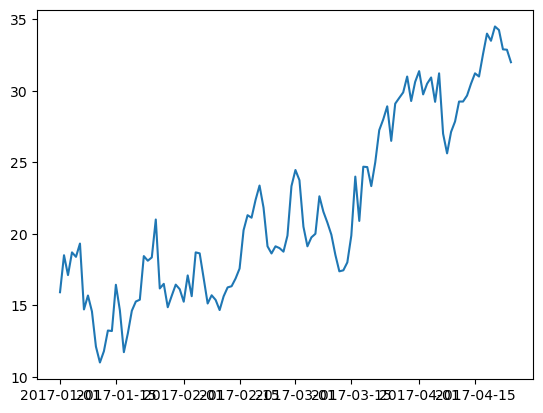

In [7]:
plt.plot(df)
plt.show()

In [14]:
values=df.values
train,test= values[0:90,:], values[90:114,:]

#add step elements into train and test
test= np.append(test, np.repeat(test[-1,], step))
train=np.append(train, np.repeat(train[-1,], step))

trainX, trainY=convertToMatrix(train, step)
testX, testY=convertToMatrix(test, step)

trainX=np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX=np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


C’est notamment le cas dans la librairie Keras que nous utilisons. Le code ci-dessous permet de définir un modèle simple à 3 couches RNN, où R=11, qui prend en entrée des séquences de taille T=1 caractère, chacun encodé comme un vecteur de taille M= step.

In [68]:
model= Sequential()
model.add(SimpleRNN(units=11, input_shape=(1,step), activation="relu"))
model.add(Dense(11, activation= "relu"))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 11)                154       
                                                                 
 dense_12 (Dense)            (None, 11)                132       
                                                                 
 dense_13 (Dense)            (None, 1)                 12        
                                                                 
Total params: 298
Trainable params: 298
Non-trainable params: 0
_________________________________________________________________


On voit alors que notre modèle a 298 paramètres (ou poids) à apprendre.



In [69]:
model.fit(trainX, trainY, epochs=100, batch_size=16, verbose=2)
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)
predicted=np.concatenate((trainPredict, testPredict),axis=0)

trainScore=model.evaluate(trainX, trainY, verbose=0)
print(trainScore)


Epoch 1/100
6/6 - 3s - loss: 413.2237 - 3s/epoch - 429ms/step
Epoch 2/100
6/6 - 0s - loss: 390.5136 - 25ms/epoch - 4ms/step
Epoch 3/100
6/6 - 0s - loss: 368.2307 - 49ms/epoch - 8ms/step
Epoch 4/100
6/6 - 0s - loss: 346.4403 - 33ms/epoch - 5ms/step
Epoch 5/100
6/6 - 0s - loss: 324.3119 - 34ms/epoch - 6ms/step
Epoch 6/100
6/6 - 0s - loss: 301.5392 - 35ms/epoch - 6ms/step
Epoch 7/100
6/6 - 0s - loss: 279.5128 - 35ms/epoch - 6ms/step
Epoch 8/100
6/6 - 0s - loss: 256.1578 - 39ms/epoch - 6ms/step
Epoch 9/100
6/6 - 0s - loss: 231.9792 - 35ms/epoch - 6ms/step
Epoch 10/100
6/6 - 0s - loss: 209.0482 - 39ms/epoch - 6ms/step
Epoch 11/100
6/6 - 0s - loss: 185.7373 - 42ms/epoch - 7ms/step
Epoch 12/100
6/6 - 0s - loss: 164.4985 - 38ms/epoch - 6ms/step
Epoch 13/100
6/6 - 0s - loss: 146.0153 - 35ms/epoch - 6ms/step
Epoch 14/100
6/6 - 0s - loss: 126.8294 - 39ms/epoch - 6ms/step
Epoch 15/100
6/6 - 0s - loss: 110.3809 - 30ms/epoch - 5ms/step
Epoch 16/100
6/6 - 0s - loss: 93.9943 - 36ms/epoch - 6ms/step
Ep

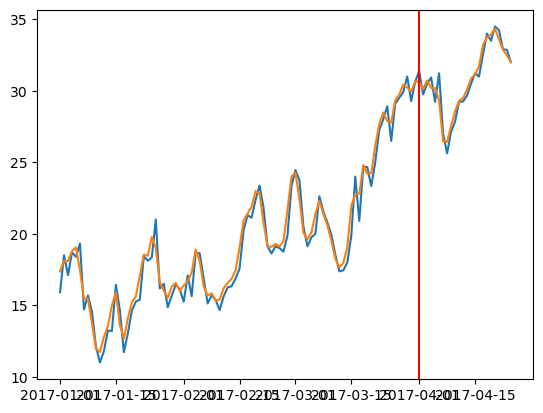

In [70]:
index= df.index.values
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[90], c="r")
plt.show()

In [71]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [72]:
rmse=sqrt(mean_squared_error(df,predicted))
print(rmse)

0.8140200697120633
